In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [7]:
df = pd.read_csv(r"/content/Final_data (1).csv")

In [8]:
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4053,38.20,Female,61.83,1.96,176.98,146.05,50.93,1.38,910.80,Yoga,...,1786.41,0.501475,1.443312,0.754621,0.825234,942.20,48.590533,930.4512,6.367551e+19,Low
4054,23.27,Female,67.70,1.61,185.74,160.43,66.13,1.34,883.60,Yoga,...,2581.89,0.498689,1.901182,0.788396,0.863734,962.40,49.278948,902.4632,6.309165e+19,Low
4055,24.23,Male,88.50,1.79,177.24,153.93,64.81,1.76,2060.78,Strength,...,1383.65,0.495385,0.796497,0.792671,0.868483,138.22,62.618906,1232.2816,8.665336e+19,High
4056,29.63,Male,99.98,1.68,181.56,133.57,61.08,1.46,1399.26,Cardio,...,1543.24,0.501179,0.772655,0.601677,0.735680,1304.74,64.987000,1080.4584,1.362429e+20,Very High


In [9]:
print(df.head())

     Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0  34.91    Male        65.27        1.62   188.58   157.65        69.05   
1  23.37  Female        56.41        1.55   179.43   131.75        73.18   
2  33.20  Female        58.98        1.67   175.04   123.95        54.96   
3  38.69  Female        93.78        1.70   191.21   155.10        50.07   
4  45.09    Male        52.42        1.88   193.58   152.88        70.84   

   Session_Duration (hours)  Calories_Burned Workout_Type  ...  \
0                      1.00          1080.90     Strength  ...   
1                      1.37          1809.91         HIIT  ...   
2                      0.91           802.26       Cardio  ...   
3                      1.10          1450.79         HIIT  ...   
4                      1.08          1166.40     Strength  ...   

   cal_from_macros  pct_carbs  protein_per_kg   pct_HRR  pct_maxHR  \
0          2139.59   0.500432        1.624789  0.741237   0.835985   
1     

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             4058 non-null   float64
 1   Gender                          4058 non-null   object 
 2   Weight (kg)                     4058 non-null   float64
 3   Height (m)                      4058 non-null   float64
 4   Max_BPM                         4058 non-null   float64
 5   Avg_BPM                         4058 non-null   float64
 6   Resting_BPM                     4058 non-null   float64
 7   Session_Duration (hours)        4058 non-null   float64
 8   Calories_Burned                 4058 non-null   float64
 9   Workout_Type                    4058 non-null   object 
 10  Fat_Percentage                  4058 non-null   float64
 11  Water_Intake (liters)           4058 non-null   float64
 12  Workout_Frequency (days/week)   40

In [11]:
print(df.describe())

               Age  Weight (kg)   Height (m)      Max_BPM      Avg_BPM  \
count  4058.000000  4058.000000  4058.000000  4058.000000  4058.000000   
mean     38.836380    73.982859     1.723664   180.095389   143.769406   
std      12.103528    21.153727     0.127520    11.503607    14.282226   
min      18.000000    39.360000     1.490000   159.370000   119.260000   
25%      28.265000    58.250000     1.620000   170.520000   131.380000   
50%      39.915000    70.195000     1.720000   180.340000   143.035000   
75%      49.537500    85.992500     1.800000   189.770000   156.280000   
max      59.430000   130.550000     2.000000   199.640000   169.720000   

       Resting_BPM  Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
count  4058.000000               4058.000000      4058.000000     4058.000000   
mean     62.233546                  1.254253      1276.970572       26.130380   
std       7.308123                  0.348004       509.945093        5.015501   
min      

In [12]:
# Check missing values
print(df.isnull().sum())

Age                               0
Gender                            0
Weight (kg)                       0
Height (m)                        0
Max_BPM                           0
Avg_BPM                           0
Resting_BPM                       0
Session_Duration (hours)          0
Calories_Burned                   0
Workout_Type                      0
Fat_Percentage                    0
Water_Intake (liters)             0
Workout_Frequency (days/week)     0
Experience_Level                  0
BMI                               0
Daily meals frequency             0
Physical exercise                 0
Carbs                             0
Proteins                          0
Fats                              0
Calories                          0
meal_name                         0
meal_type                         0
diet_type                         0
sugar_g                           0
sodium_mg                         0
cholesterol_mg                    0
serving_size_g              

In [13]:
# Drop rows with too many missing values (optional)
df = df.dropna(thresh=len(df.columns) - 3)

In [14]:
# Fill missing numerical values with median
num_cols = df.select_dtypes(include=['float64','int64']).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

/tmp/ipython-input-2873272738.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df[col].median())


In [15]:
# Fill missing categorical values with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

/tmp/ipython-input-928659194.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df[col].mode()[0])


In [16]:
# 4. Fix Data Types
# Convert categorical columns to category type
categorical_features = ['Gender','Workout_Type','Burns_Calories_Bin']
for col in categorical_features:
    df[col] = df[col].astype('category')

/tmp/ipython-input-742800186.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype('category')
/tmp/ipython-input-742800186.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype('category')
/tmp/ipython-input-742800186.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

In [17]:
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4052,55.66,Male,117.51,1.90,198.96,126.52,68.24,0.66,436.00,Yoga,...,1658.83,0.501510,0.705557,0.445838,0.635907,2543.00,76.381500,464.3364,9.013005e+19,High
4053,38.20,Female,61.83,1.96,176.98,146.05,50.93,1.38,910.80,Yoga,...,1786.41,0.501475,1.443312,0.754621,0.825234,942.20,48.590533,930.4512,6.367551e+19,Low
4054,23.27,Female,67.70,1.61,185.74,160.43,66.13,1.34,883.60,Yoga,...,2581.89,0.498689,1.901182,0.788396,0.863734,962.40,49.278948,902.4632,6.309165e+19,Low
4055,24.23,Male,88.50,1.79,177.24,153.93,64.81,1.76,2060.78,Strength,...,1383.65,0.495385,0.796497,0.792671,0.868483,138.22,62.618906,1232.2816,8.665336e+19,High


In [18]:
# 5. Remove Outliers
# Example: Burns Calories per 30 min has extreme values
q_low = df['Burns Calories (per 30 min)_bc'].quantile(0.01)
q_high = df['Burns Calories (per 30 min)_bc'].quantile(0.99)
df = df[(df['Burns Calories (per 30 min)_bc'] > q_low) &
        (df['Burns Calories (per 30 min)_bc'] < q_high)]

In [19]:
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4052,55.66,Male,117.51,1.90,198.96,126.52,68.24,0.66,436.00,Yoga,...,1658.83,0.501510,0.705557,0.445838,0.635907,2543.00,76.381500,464.3364,9.013005e+19,High
4053,38.20,Female,61.83,1.96,176.98,146.05,50.93,1.38,910.80,Yoga,...,1786.41,0.501475,1.443312,0.754621,0.825234,942.20,48.590533,930.4512,6.367551e+19,Low
4054,23.27,Female,67.70,1.61,185.74,160.43,66.13,1.34,883.60,Yoga,...,2581.89,0.498689,1.901182,0.788396,0.863734,962.40,49.278948,902.4632,6.309165e+19,Low
4055,24.23,Male,88.50,1.79,177.24,153.93,64.81,1.76,2060.78,Strength,...,1383.65,0.495385,0.796497,0.792671,0.868483,138.22,62.618906,1232.2816,8.665336e+19,High


In [20]:
# 6. Standardize Units
# Ensure height is in meters (if some values are in cm)
df['Height (m)'] = np.where(df['Height (m)'] > 3, df['Height (m)']/100, df['Height (m)'])

/tmp/ipython-input-1373246655.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Height (m)'] = np.where(df['Height (m)'] > 3, df['Height (m)']/100, df['Height (m)'])


In [21]:
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4052,55.66,Male,117.51,1.90,198.96,126.52,68.24,0.66,436.00,Yoga,...,1658.83,0.501510,0.705557,0.445838,0.635907,2543.00,76.381500,464.3364,9.013005e+19,High
4053,38.20,Female,61.83,1.96,176.98,146.05,50.93,1.38,910.80,Yoga,...,1786.41,0.501475,1.443312,0.754621,0.825234,942.20,48.590533,930.4512,6.367551e+19,Low
4054,23.27,Female,67.70,1.61,185.74,160.43,66.13,1.34,883.60,Yoga,...,2581.89,0.498689,1.901182,0.788396,0.863734,962.40,49.278948,902.4632,6.309165e+19,Low
4055,24.23,Male,88.50,1.79,177.24,153.93,64.81,1.76,2060.78,Strength,...,1383.65,0.495385,0.796497,0.792671,0.868483,138.22,62.618906,1232.2816,8.665336e+19,High


In [22]:
# 7. Feature Engineering
df['BMI'] = df['Weight (kg)'] / (df['Height (m)']**2)
df['HRR'] = df['Max_BPM'] - df['Resting_BPM']
df['Efficiency'] = df['Calories_Burned'] / df['Session_Duration (hours)']

/tmp/ipython-input-749224326.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BMI'] = df['Weight (kg)'] / (df['Height (m)']**2)
/tmp/ipython-input-749224326.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HRR'] = df['Max_BPM'] - df['Resting_BPM']
/tmp/ipython-input-749224326.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [23]:
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin,HRR,Efficiency
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium,119.53,1080.900000
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High,106.25,1321.102190
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High,120.08,881.604396
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High,141.14,1318.900000
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low,122.74,1080.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4052,55.66,Male,117.51,1.90,198.96,126.52,68.24,0.66,436.00,Yoga,...,0.705557,0.445838,0.635907,2543.00,76.381500,464.3364,9.013005e+19,High,130.72,660.606061
4053,38.20,Female,61.83,1.96,176.98,146.05,50.93,1.38,910.80,Yoga,...,1.443312,0.754621,0.825234,942.20,48.590533,930.4512,6.367551e+19,Low,126.05,660.000000
4054,23.27,Female,67.70,1.61,185.74,160.43,66.13,1.34,883.60,Yoga,...,1.901182,0.788396,0.863734,962.40,49.278948,902.4632,6.309165e+19,Low,119.61,659.402985
4055,24.23,Male,88.50,1.79,177.24,153.93,64.81,1.76,2060.78,Strength,...,0.796497,0.792671,0.868483,138.22,62.618906,1232.2816,8.665336e+19,High,112.43,1170.897727


In [24]:
# 7. Feature Engineering
df['BMI'] = df['Weight (kg)'] / (df['Height (m)']**2)
df['HRR'] = df['Max_BPM'] - df['Resting_BPM']
df['Efficiency'] = df['Calories_Burned'] / df['Session_Duration (hours)']


/tmp/ipython-input-931402493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BMI'] = df['Weight (kg)'] / (df['Height (m)']**2)
/tmp/ipython-input-931402493.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HRR'] = df['Max_BPM'] - df['Resting_BPM']
/tmp/ipython-input-931402493.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [25]:
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin,HRR,Efficiency
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium,119.53,1080.900000
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High,106.25,1321.102190
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High,120.08,881.604396
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High,141.14,1318.900000
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low,122.74,1080.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4052,55.66,Male,117.51,1.90,198.96,126.52,68.24,0.66,436.00,Yoga,...,0.705557,0.445838,0.635907,2543.00,76.381500,464.3364,9.013005e+19,High,130.72,660.606061
4053,38.20,Female,61.83,1.96,176.98,146.05,50.93,1.38,910.80,Yoga,...,1.443312,0.754621,0.825234,942.20,48.590533,930.4512,6.367551e+19,Low,126.05,660.000000
4054,23.27,Female,67.70,1.61,185.74,160.43,66.13,1.34,883.60,Yoga,...,1.901182,0.788396,0.863734,962.40,49.278948,902.4632,6.309165e+19,Low,119.61,659.402985
4055,24.23,Male,88.50,1.79,177.24,153.93,64.81,1.76,2060.78,Strength,...,0.796497,0.792671,0.868483,138.22,62.618906,1232.2816,8.665336e+19,High,112.43,1170.897727


In [26]:
# 8. Encode Categorical Variables
# Label encode Gender and Burns_Calories_Bin
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Burns_Calories_Bin'] = le.fit_transform(df['Burns_Calories_Bin'])

/tmp/ipython-input-413427705.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = le.fit_transform(df['Gender'])
/tmp/ipython-input-413427705.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Burns_Calories_Bin'] = le.fit_transform(df['Burns_Calories_Bin'])


In [27]:
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin,HRR,Efficiency
0,34.91,1,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,2,119.53,1080.900000
1,23.37,0,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,0,106.25,1321.102190
2,33.20,0,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,0,120.08,881.604396
3,38.69,0,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,0,141.14,1318.900000
4,45.09,1,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,1,122.74,1080.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4052,55.66,1,117.51,1.90,198.96,126.52,68.24,0.66,436.00,Yoga,...,0.705557,0.445838,0.635907,2543.00,76.381500,464.3364,9.013005e+19,0,130.72,660.606061
4053,38.20,0,61.83,1.96,176.98,146.05,50.93,1.38,910.80,Yoga,...,1.443312,0.754621,0.825234,942.20,48.590533,930.4512,6.367551e+19,1,126.05,660.000000
4054,23.27,0,67.70,1.61,185.74,160.43,66.13,1.34,883.60,Yoga,...,1.901182,0.788396,0.863734,962.40,49.278948,902.4632,6.309165e+19,1,119.61,659.402985
4055,24.23,1,88.50,1.79,177.24,153.93,64.81,1.76,2060.78,Strength,...,0.796497,0.792671,0.868483,138.22,62.618906,1232.2816,8.665336e+19,0,112.43,1170.897727


In [28]:
# One-hot encode Workout_Type
df = pd.get_dummies(df, columns=['Workout_Type'], drop_first=True)

In [29]:
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,...,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin,HRR,Efficiency,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,34.91,1,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,26.800377,...,725.10,47.777394,685.1600,7.260425e+19,2,119.53,1080.900000,False,True,False
1,23.37,0,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,27.655021,...,-232.91,40.809803,978.6184,1.020506e+20,0,106.25,1321.102190,True,False,False
2,33.20,0,58.98,1.67,175.04,123.95,54.96,0.91,802.26,24.320821,...,805.74,44.635580,654.5266,1.079607e+20,0,120.08,881.604396,False,False,False
3,38.69,0,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,32.813572,...,1206.21,63.007432,773.6300,8.987921e+19,0,141.14,1318.900000,True,False,False
4,45.09,1,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,17.307319,...,303.60,43.347504,711.4176,5.264685e+19,1,122.74,1080.000000,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4052,55.66,1,117.51,1.90,198.96,126.52,68.24,0.66,436.00,35.000000,...,2543.00,76.381500,464.3364,9.013005e+19,0,130.72,660.606061,False,False,True
4053,38.20,0,61.83,1.96,176.98,146.05,50.93,1.38,910.80,21.412691,...,942.20,48.590533,930.4512,6.367551e+19,1,126.05,660.000000,False,False,True
4054,23.27,0,67.70,1.61,185.74,160.43,66.13,1.34,883.60,27.209825,...,962.40,49.278948,902.4632,6.309165e+19,1,119.61,659.402985,False,False,True
4055,24.23,1,88.50,1.79,177.24,153.93,64.81,1.76,2060.78,29.244174,...,138.22,62.618906,1232.2816,8.665336e+19,0,112.43,1170.897727,False,True,False


In [30]:
# 9. Normalize / Scale Features
scaler = StandardScaler()
scaled_cols = ['Age','Weight (kg)','Height (m)','Max_BPM','Avg_BPM',
               'Resting_BPM','Session_Duration (hours)','Calories_Burned',
               'BMI','HRR','Efficiency']
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])

In [31]:
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,...,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin,HRR,Efficiency,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,-0.327014,1,-0.397969,-0.814498,0.739264,0.983085,0.925293,-0.733915,-0.389450,26.800377,...,725.10,47.777394,685.1600,7.260425e+19,2,0.127543,0.341027,False,True,False
1,-1.278692,0,-0.829058,-1.363342,-0.057703,-0.833375,1.488351,0.325489,1.036438,27.655021,...,-232.91,40.809803,978.6184,1.020506e+20,0,-0.868487,1.419545,True,False,False
2,-0.468034,0,-0.704013,-0.422467,-0.440074,-1.380416,-0.995646,-0.991608,-0.934449,24.320821,...,805.74,44.635580,654.5266,1.079607e+20,0,0.168795,-0.553820,False,False,False
3,-0.015286,0,0.989200,-0.187248,0.968338,0.804244,-1.662317,-0.447590,0.334026,32.813572,...,1206.21,63.007432,773.6300,8.987921e+19,0,1.748343,1.409657,True,False,False
4,0.512508,1,-1.023193,1.224065,1.174766,0.648548,1.169330,-0.504855,-0.222219,17.307319,...,303.60,43.347504,711.4176,5.264685e+19,1,0.368301,0.336986,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4052,1.384193,1,2.143796,1.380877,1.643365,-1.200173,0.814863,-1.707422,-1.650825,35.000000,...,2543.00,76.381500,464.3364,9.013005e+19,0,0.966819,-1.546112,False,False,True
4053,-0.055695,0,-0.565344,1.851315,-0.271099,0.169535,-1.545070,0.354122,-0.722153,21.412691,...,942.20,48.590533,930.4512,6.367551e+19,1,0.616558,-1.548833,False,False,True
4054,-1.286939,0,-0.279736,-0.892904,0.491899,1.178056,0.527199,0.239591,-0.775354,27.209825,...,962.40,49.278948,902.4632,6.309165e+19,1,0.133544,-1.551514,False,False,True
4055,-1.207770,1,0.732299,0.518408,-0.248453,0.722188,0.347239,1.442158,1.527120,29.244174,...,138.22,62.618906,1232.2816,8.665336e+19,0,-0.404973,0.745121,False,True,False


In [32]:
# 10. Remove Duplicates
df = df.drop_duplicates()

In [33]:
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,...,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin,HRR,Efficiency,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,-0.327014,1,-0.397969,-0.814498,0.739264,0.983085,0.925293,-0.733915,-0.389450,26.800377,...,725.10,47.777394,685.1600,7.260425e+19,2,0.127543,0.341027,False,True,False
1,-1.278692,0,-0.829058,-1.363342,-0.057703,-0.833375,1.488351,0.325489,1.036438,27.655021,...,-232.91,40.809803,978.6184,1.020506e+20,0,-0.868487,1.419545,True,False,False
2,-0.468034,0,-0.704013,-0.422467,-0.440074,-1.380416,-0.995646,-0.991608,-0.934449,24.320821,...,805.74,44.635580,654.5266,1.079607e+20,0,0.168795,-0.553820,False,False,False
3,-0.015286,0,0.989200,-0.187248,0.968338,0.804244,-1.662317,-0.447590,0.334026,32.813572,...,1206.21,63.007432,773.6300,8.987921e+19,0,1.748343,1.409657,True,False,False
4,0.512508,1,-1.023193,1.224065,1.174766,0.648548,1.169330,-0.504855,-0.222219,17.307319,...,303.60,43.347504,711.4176,5.264685e+19,1,0.368301,0.336986,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4052,1.384193,1,2.143796,1.380877,1.643365,-1.200173,0.814863,-1.707422,-1.650825,35.000000,...,2543.00,76.381500,464.3364,9.013005e+19,0,0.966819,-1.546112,False,False,True
4053,-0.055695,0,-0.565344,1.851315,-0.271099,0.169535,-1.545070,0.354122,-0.722153,21.412691,...,942.20,48.590533,930.4512,6.367551e+19,1,0.616558,-1.548833,False,False,True
4054,-1.286939,0,-0.279736,-0.892904,0.491899,1.178056,0.527199,0.239591,-0.775354,27.209825,...,962.40,49.278948,902.4632,6.309165e+19,1,0.133544,-1.551514,False,False,True
4055,-1.207770,1,0.732299,0.518408,-0.248453,0.722188,0.347239,1.442158,1.527120,29.244174,...,138.22,62.618906,1232.2816,8.665336e+19,0,-0.404973,0.745121,False,True,False


In [34]:
# 11. Final Validation
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 3975 entries, 0 to 4056
Data columns (total 58 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             3975 non-null   float64
 1   Gender                          3975 non-null   int64  
 2   Weight (kg)                     3975 non-null   float64
 3   Height (m)                      3975 non-null   float64
 4   Max_BPM                         3975 non-null   float64
 5   Avg_BPM                         3975 non-null   float64
 6   Resting_BPM                     3975 non-null   float64
 7   Session_Duration (hours)        3975 non-null   float64
 8   Calories_Burned                 3975 non-null   float64
 9   Fat_Percentage                  3975 non-null   float64
 10  Water_Intake (liters)           3975 non-null   float64
 11  Workout_Frequency (days/week)   3975 non-null   float64
 12  Experience_Level                3975 no

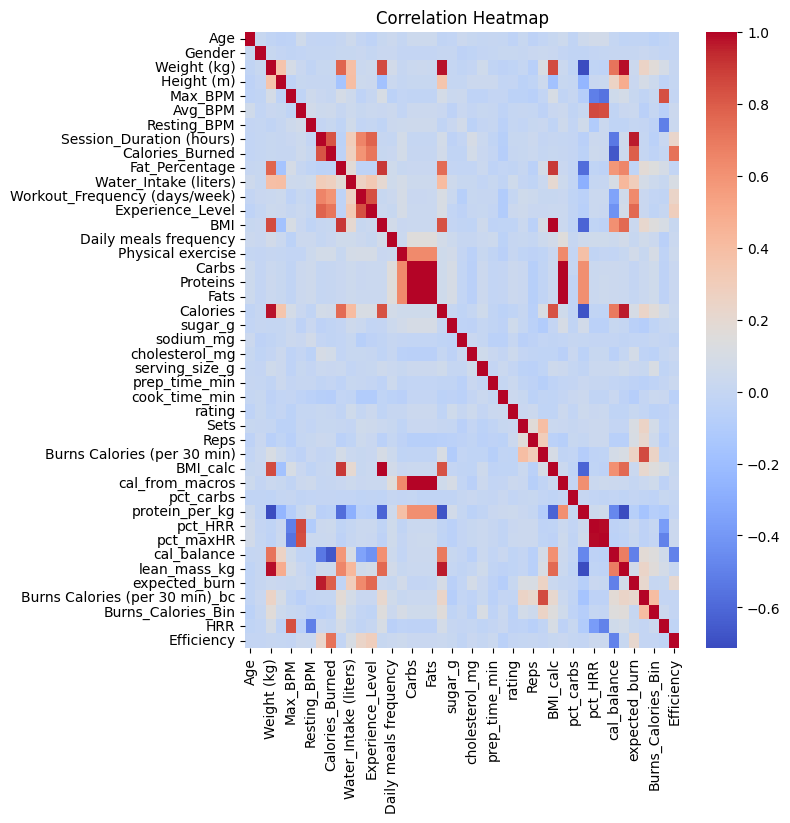

In [35]:
# Correlation heatmap
plt.figure(figsize=(7,8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [37]:
workout_effectiveness = df.groupby(['Workout_Type_HIIT', 'Workout_Type_Strength', 'Workout_Type_Yoga'])[['Calories_Burned', 'Efficiency']].mean().reset_index()

# Map the one-hot encoded columns back to workout type names for better readability
def get_workout_type(row):
    if row['Workout_Type_HIIT'] == True:
        return 'HIIT'
    elif row['Workout_Type_Strength'] == True:
        return 'Strength'
    elif row['Workout_Type_Yoga'] == True:
        return 'Yoga'
    else:
        return 'Cardio' # Assuming Cardio is the base category if others are false

workout_effectiveness['Workout_Type'] = workout_effectiveness.apply(get_workout_type, axis=1)

# Drop the individual one-hot encoded columns if not needed for display
workout_effectiveness = workout_effectiveness.drop(columns=['Workout_Type_HIIT', 'Workout_Type_Strength', 'Workout_Type_Yoga'])

display(workout_effectiveness.sort_values(by='Calories_Burned', ascending=False))

,Calories_Burned,Efficiency,Workout_Type
3,0.739212,1.322511,HIIT
2,0.152010,0.268167,Strength
0,-0.159390,-0.272681,Cardio
1,-0.738403,-1.329595,Yoga


/tmp/ipython-input-2446076950.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Workout_Type', y='Calories_Burned', data=workout_effectiveness_sorted, ax=axes[0], palette='viridis')
/tmp/ipython-input-2446076950.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Workout_Type', y='Efficiency', data=workout_effectiveness_sorted, ax=axes[1], palette='magma')


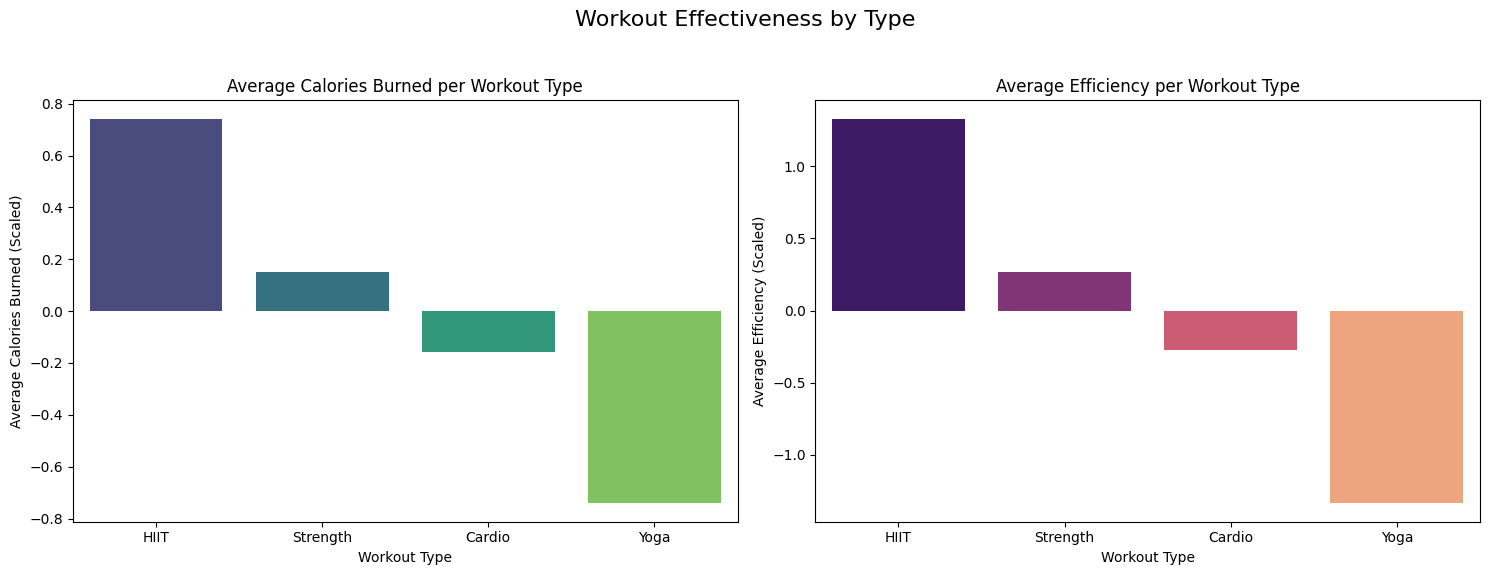

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the DataFrame by Calories_Burned for better visualization
workout_effectiveness_sorted = workout_effectiveness.sort_values(by='Calories_Burned', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Workout Effectiveness by Type', fontsize=16)

# Bar plot for Calories Burned
sns.barplot(x='Workout_Type', y='Calories_Burned', data=workout_effectiveness_sorted, ax=axes[0], palette='viridis')
axes[0].set_title('Average Calories Burned per Workout Type')
axes[0].set_xlabel('Workout Type')
axes[0].set_ylabel('Average Calories Burned (Scaled)')

# Bar plot for Efficiency
sns.barplot(x='Workout_Type', y='Efficiency', data=workout_effectiveness_sorted, ax=axes[1], palette='magma')
axes[1].set_title('Average Efficiency per Workout Type')
axes[1].set_xlabel('Workout Type')
axes[1].set_ylabel('Average Efficiency (Scaled)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#Key Findings:

1) HIIT Workouts Lead in Calorie Burn and Efficiency.

2) Strength Training is Highly Effective: Strength workouts follow HIIT  closely in terms of average Calories_Burned and Efficiency.

3) Cardio Provides Moderate Caloric Output: Cardio workouts show moderate levels of Calories_Burned and Efficiency.

4) Yoga's Lower Caloric Impact:This is expected as Yoga often focuses more on flexibility, balance, and mindfulness rather than intense cardiovascular or strength-based calorie burning.

5) Session Duration Influences Calorie Burn: There's a notable positive correlation between Calories_Burned and Session_Duration (hours), confirming that longer workout durations generally lead to more calories burned.

#SUGGESTION:

1) For individuals prioritizing high calorie burn and efficiency, recommend HIIT and Strength training.

2) For those focusing on flexibility, balance, or recovery, Yoga would be more appropriate.

3) Cardio can be suggested for general cardiovascular health and endurance.